In [1]:
from datascience import *
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from pandas.api.types import CategoricalDtype

from sklearn.feature_extraction import DictVectorizer

Want to see if there's a correlation between a player's position and how long they play in a game.

In [2]:
plyboxscore = pd.read_csv("Basketball-PlayerBoxScore.csv")
plyboxscore.head(3)

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,playFT%,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,...,1.0,1,1,2,CLE,East,Central,Home,Win,0
1,2012-10-30,19:00,Regular,Ariza,Trevor,WAS,East,Southeast,Away,Loss,...,0.5,1,2,3,CLE,East,Central,Home,Win,0
2,2012-10-30,19:00,Regular,Okafor,Emeka,WAS,East,Southeast,Away,Loss,...,0.5,5,2,7,CLE,East,Central,Home,Win,0


Check where the null values are.

In [3]:
plyboxscore.isna().sum()

gmDate         0
gmTime         0
seasTyp        0
playLNm        0
playFNm        0
teamAbbr       0
teamConf       0
teamDiv        0
teamLoc        0
teamRslt       0
teamDayOff     0
offLNm1        0
offFNm1        0
offLNm2        0
offFNm2        0
offLNm3       41
offFNm3       41
playDispNm     0
playStat       0
playMin        0
playPos        0
playHeight     0
playWeight     0
playBDate      0
playPTS        0
playAST        0
playTO         0
playSTL        0
playBLK        0
playPF         0
playFGA        0
playFGM        0
playFG%        0
play2PA        0
play2PM        0
play2P%        0
play3PA        0
play3PM        0
play3P%        0
playFTA        0
playFTM        0
playFT%        0
playORB        0
playDRB        0
playTRB        0
opptAbbr       0
opptConf       0
opptDiv        0
opptLoc        0
opptRslt       0
opptDayOff     0
dtype: int64

The null values are a few players' first and last name. Now, check all the players' positions in the dataset.

In [4]:
plyboxscore['playPos'].value_counts()

SG    33794
PF    33466
PG    33091
SF    29993
C     25060
F       191
G       118
Name: playPos, dtype: int64

Make a new dataframe and replace SG/PG with G and PF/SF with F. Grouped this dataframe by the position and took the mean.

In [5]:
position_test = plyboxscore.replace(['PG', 'SG'], 'G').replace(['PF', 'SF'], 'F')
groupby_playpos = position_test.groupby("playPos").mean()
groupby_playpos

,teamDayOff,playMin,playHeight,playWeight,playPTS,playAST,playTO,playSTL,playBLK,playPF,...,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,opptDayOff
playPos,,,,,,,,,,,,,,,,,,,,,
C,1.941540,21.636153,83.213288,249.510056,8.908619,1.242298,1.272227,0.549521,0.948524,2.286512,...,0.443057,0.148723,0.051737,2.408739,1.625579,0.420333,2.009018,4.434876,6.443895,1.936472
F,1.943896,22.572930,80.632663,228.395994,9.340801,1.478963,1.122451,0.689772,0.521084,1.936261,...,2.081163,0.735648,0.203271,2.056795,1.537141,0.409245,1.149065,3.445719,4.594784,1.942467
G,1.938600,23.739773,75.902437,196.269988,10.325702,3.061684,1.490142,0.846574,0.221348,1.739101,...,3.142964,1.133024,0.279189,2.166082,1.742982,0.446968,0.479367,2.253123,2.732490,1.937242


Check if there's any null values in our new groupby_playpos dataframe.

In [6]:
groupby_playpos.isnull().values.any()

False

Make a box and whisker plot on player minute to see if there's any correlation between a player's position and, on average, how long they played. 

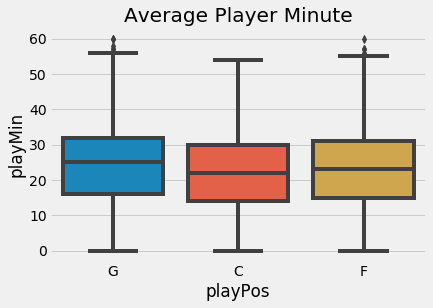

In [7]:
#the plot below does not seem to show any correlation between a player's position and how long they played
#Figure 1
sns.boxplot(x="playPos", y="playMin", data=position_test).set_title('Average Player Minute');

The plot does not seem to show any correlation between a player's position and how long they played. Now, standardize the groupby_playpos dataframe.

In [8]:
#defined a standardize function
def standard(df):
    columns_list = []
    for col in df.columns:
        columns_list= np.append(columns_list, col)
    for i in columns_list:
        df[i] = (df[i] - df[i].mean())/(df[i].std())

In [9]:
#standardize the new dataframe
standard(groupby_playpos)
groupby_playpos.head(3)

,teamDayOff,playMin,playHeight,playWeight,playPTS,playAST,playTO,playSTL,playBLK,playPF,...,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,opptDayOff
playPos,,,,,,,,,,,,,,,,,,,,,
C,0.073425,-0.961629,0.889268,0.924486,-0.848733,-0.692828,-0.122844,-0.980920,1.053139,1.079244,...,-1.063109,-1.057674,-1.090903,1.100291,-0.093502,-0.267293,1.038784,0.967517,0.998814,-0.691238
F,0.961264,-0.072766,0.193254,0.136918,-0.253674,-0.453581,-0.932903,-0.037125,-0.116480,-0.184060,...,0.141234,0.127595,0.217658,-0.853494,-0.949965,-0.839193,-0.082705,0.062074,0.002368,1.146645
G,-1.034689,1.034396,-1.082523,-1.061404,1.102407,1.146409,1.055747,1.018046,-0.936659,-0.895184,...,0.921875,0.930078,0.873245,-0.246797,1.043467,1.106485,-0.956079,-1.029591,-1.001182,-0.455407


Make a heatmap with all the statistics.

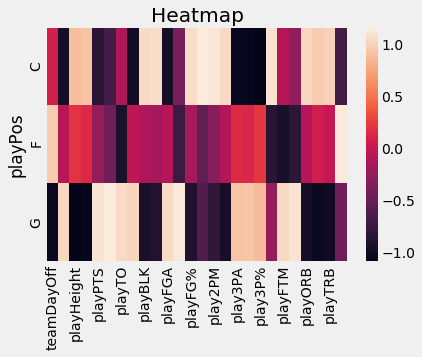

In [10]:
#Figure 2 
sns.heatmap(groupby_playpos).set_title('Heatmap');

Make a box and whisker plot on the average player heights.

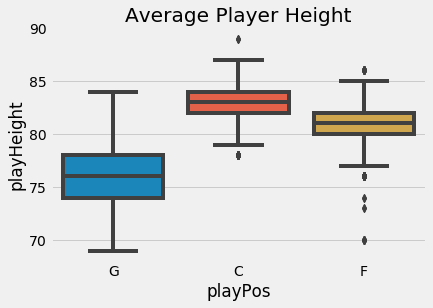

In [11]:
#Figure 3
sns.boxplot(x="playPos", y="playHeight", data=position_test).set_title('Average Player Height');

Make a box and whisker plot on the average player weights.

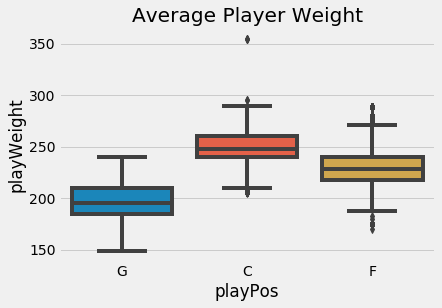

In [12]:
#Figure 4
sns.boxplot(x="playPos", y="playWeight", data=position_test).set_title('Average Player Weight');

Now for predictive modeling, we want to predict a player's position. Make a copy of the dataframe that replaced SF/PF with F and SG/PG with G.

In [13]:
second_copy_ply = position_test.copy()
second_copy_ply.head(3)

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,playFT%,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,...,1.0,1,1,2,CLE,East,Central,Home,Win,0
1,2012-10-30,19:00,Regular,Ariza,Trevor,WAS,East,Southeast,Away,Loss,...,0.5,1,2,3,CLE,East,Central,Home,Win,0
2,2012-10-30,19:00,Regular,Okafor,Emeka,WAS,East,Southeast,Away,Loss,...,0.5,5,2,7,CLE,East,Central,Home,Win,0


Decided on a list of columns to drop. Make a new column 'playPosLabel' which had different numbers corresponding to the position the player had.

In [14]:
cols_drop2 = ['gmDate', 'gmTime', 'seasTyp', 'playLNm', 'playFNm', 'teamAbbr', 'teamConf', 'teamDiv', 'teamLoc', 
              'teamRslt', 'teamDayOff', 'offLNm1', 'offFNm1', 'offLNm2', 'offFNm2', 'offLNm3', 'offFNm3', 
              'playBDate', 'opptAbbr', 'opptConf', 'opptDiv', 'opptLoc', 'opptRslt', 
              'opptDayOff'] #columns to be dropped

second_copy_ply.drop(cols_drop2, axis = 1, inplace = True)

pos_map = {'G': 1, 'C': 2, 'F': 3}
second_copy_ply['playPosLabel'] = second_copy_ply['playPos'].map(pos_map) 

second_copy_ply.head(3)

,playDispNm,playStat,playMin,playPos,playHeight,playWeight,playPTS,playAST,playTO,playSTL,...,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,playPosLabel
0,A.J. Price,Starter,29,G,74,195,7,6,1,0,...,9,2,0.2222,1,1,1.0,1,1,2,1
1,Trevor Ariza,Starter,25,G,80,200,9,4,0,3,...,4,2,0.5000,2,1,0.5,1,2,3,1
2,Emeka Okafor,Starter,25,C,82,255,10,0,1,0,...,0,0,0.0000,4,2,0.5,5,2,7,2


Split our data into train and test data.

In [15]:
#split our data
from sklearn.model_selection import train_test_split

train, test = train_test_split(second_copy_ply, test_size=0.1, random_state=42)

In [16]:
train.head(3)

,playDispNm,playStat,playMin,playPos,playHeight,playWeight,playPTS,playAST,playTO,playSTL,...,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,playPosLabel
105482,Aaron Brooks,Bench,21,G,72,161,4,7,2,1,...,3,0,0.0000,2,2,1.0000,0,2,2,1
2119,Jae Crowder,Starter,13,F,78,235,3,1,0,0,...,4,1,0.2500,0,0,0.0000,0,0,0,3
43466,Isaiah Thomas,Starter,34,G,69,185,12,5,3,3,...,6,2,0.3333,3,2,0.6667,0,3,3,1


In [17]:
test.head(3)

,playDispNm,playStat,playMin,playPos,playHeight,playWeight,playPTS,playAST,playTO,playSTL,...,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,playPosLabel
19298,Tobias Harris,Starter,21,F,80,226,7,0,4,0,...,1,1,1.0,2,2,1.00,0,8,8,3
4710,Ty Lawson,Starter,38,G,71,195,17,9,3,4,...,4,2,0.5,1,1,1.00,0,4,4,1
92583,Tony Parker,Starter,24,G,74,180,13,6,3,0,...,0,0,0.0,4,3,0.75,0,4,4,1


Create functions as a pipeline to make our X matrix and y label.

In [18]:
def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

def process_data_gm(data):
    """Process the data for a guided model."""
    
    # Transform Data, Select Features
    data = select_columns(data,  
                          'playHeight',
                          'playWeight',
                          'playPosLabel'
                         )
    
    # Return predictors and response variables separately
    X = data.drop(['playPosLabel'], axis = 1)
    y = data.loc[:, 'playPosLabel']
    
    return X, y

Call the functions on both train and test data. 

In [19]:
X_train, y_train = process_data_gm(train)
X_test, y_test = process_data_gm(test)

Defined random forest classifier model.

In [20]:
from sklearn.ensemble import RandomForestClassifier as RFC

rfc_b = RFC()
model = rfc_b.fit(X_train,y_train)

Get the accuracy of the model on the train dataset.

In [21]:
training_accuracy = model.score(X_train, y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.8797996303722679


Cross validation to ensure we're not overfitting/underfitting.

In [22]:
from sklearn.model_selection import cross_val_score

cross_val_score_train = cross_val_score(model, X_train, y_train, cv=5)
print(cross_val_score_train)

[0.88162261 0.87901384 0.87919224 0.88019124 0.87830027]


In [23]:
#take the average of our cross validation scores
average_cross_val = np.mean(cross_val_score_train)
print(average_cross_val)

0.8796640386570204


In [24]:
y_pred = model.predict(X_train)
y_pred

array([1, 3, 1, ..., 2, 1, 3])

Construct confusion matrix to get the precision, recall, and false-alarm rate scores.

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_train, y_pred)
confusion_matrix1

array([[55947,     0,  4321],
       [    0, 17946,  4609],
       [ 4130,  3785, 49403]])

In [26]:
false_pos = confusion_matrix1.sum(axis=0) - np.diag(confusion_matrix1)  
false_neg = confusion_matrix1.sum(axis=1) - np.diag(confusion_matrix1)
true_pos = np.diag(confusion_matrix1)
true_neg = confusion_matrix1.sum() - (false_pos + false_neg + true_pos)

false_pos = false_pos.astype(float)
false_neg = false_neg.astype(float)
true_pos = true_pos.astype(float)
true_neg = true_neg.astype(float)

recall = true_pos / (true_pos + false_neg)
precision = true_pos / (true_pos + false_pos)
false_alarm = false_pos / (false_pos + true_neg)

print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("False Alarm Rate: " + str(false_alarm))

Precision: [0.93125489 0.82582486 0.84691341]
Recall: [0.92830358 0.79565507 0.86191074]
False Alarm Rate: [0.05170708 0.03218921 0.10782029]


In [27]:
from sklearn.metrics import classification_report

names = ['Guard', 'Center', 'Forward']
report = classification_report(y_train, y_pred, target_names = names)
print(report)

              precision    recall  f1-score   support

       Guard       0.93      0.93      0.93     60268
      Center       0.83      0.80      0.81     22555
     Forward       0.85      0.86      0.85     57318

    accuracy                           0.88    140141
   macro avg       0.87      0.86      0.86    140141
weighted avg       0.88      0.88      0.88    140141



The precision, recall, and false-alarm rate scores are good so we can move on to check our test accuracy.

In [28]:
#get the test accuracy 
test_accuracy = model.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

Test Accuracy:  0.8815823272540457


In [29]:
y_pred_test = model.predict(X_test)
y_pred_test

array([3, 1, 1, ..., 1, 2, 2])

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
confusion_matrix_test

array([[6243,    0,  492],
       [   0, 2020,  485],
       [ 443,  424, 5465]])

In [31]:
false_pos = confusion_matrix_test.sum(axis=0) - np.diag(confusion_matrix_test)  
false_neg = confusion_matrix_test.sum(axis=1) - np.diag(confusion_matrix_test)
true_pos = np.diag(confusion_matrix_test)
true_neg = confusion_matrix_test.sum() - (false_pos + false_neg + true_pos)

false_pos = false_pos.astype(float)
false_neg = false_neg.astype(float)
true_pos = true_pos.astype(float)
true_neg = true_neg.astype(float)

recall = true_pos / (true_pos + false_neg)
precision = true_pos / (true_pos + false_pos)
false_alarm = false_pos / (false_pos + true_neg)

print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("False Alarm Rate: " + str(false_alarm))

Precision: [0.93374215 0.82651391 0.84833903]
Recall: [0.92694878 0.80638723 0.86307644]
False Alarm Rate: [0.05013013 0.03244815 0.10573593]


In [32]:
names = ['Guard', 'Center', 'Forward']
report = classification_report(y_test, y_pred_test, target_names = names)
print(report)

              precision    recall  f1-score   support

       Guard       0.93      0.93      0.93      6735
      Center       0.83      0.81      0.82      2505
     Forward       0.85      0.86      0.86      6332

    accuracy                           0.88     15572
   macro avg       0.87      0.87      0.87     15572
weighted avg       0.88      0.88      0.88     15572



Thus, our model is good.